In [246]:
#Exploratory Data Analysis

In [285]:


import pandas as pd
import os.path
from os import path
import os
import numpy as np

import pandas as pd
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import datetime

print(pd.__version__)

if path.exists('./raw_data.csv'):
    data = pd.read_csv('./raw_data.csv')
    data['hour'] = data['date'].astype('datetime64[ns]').dt.hour
    display(data)
    print (data.size)

1.2.5


,site,battery_power,site_power,solar_power,date,hour
0,134a3fa6,-1158.00,484.48,1194.36,2021-07-02 17:34:24+00:00,17
1,8d9fed87,-3461.67,1222.92,3499.83,2021-07-02 17:34:25+00:00,17
2,5688ed10,-1.67,-1389.69,1786.21,2021-07-02 17:34:25+00:00,17
3,2b33a48d,NaN,NaN,NaN,2021-07-02 17:34:26+00:00,17
4,07333ad0,-10.00,-5543.65,8171.82,2021-07-02 17:34:26+00:00,17
...,...,...,...,...,...,...
13813,eec02ec5,2382.00,1.16,-5.64,2021-07-03 02:04:39+00:00,2
13814,90791ae9,NaN,NaN,NaN,2021-07-03 02:04:40+00:00,2
13815,49b6c0dd,0.00,894.33,6.00,2021-07-03 02:04:40+00:00,2
13816,d0926969,NaN,2748.83,7.70,2021-07-03 02:04:41+00:00,2


82908


In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13818 entries, 0 to 13817
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site           13818 non-null  object 
 1   battery_power  12138 non-null  float64
 2   site_power     11903 non-null  float64
 3   solar_power    11903 non-null  float64
 4   date           13818 non-null  object 
 5   hour           13818 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 647.8+ KB


In [287]:
data.shape

(13818, 6)

In [288]:
data.head()

,site,battery_power,site_power,solar_power,date,hour
0,134a3fa6,-1158.00,484.48,1194.36,2021-07-02 17:34:24+00:00,17
1,8d9fed87,-3461.67,1222.92,3499.83,2021-07-02 17:34:25+00:00,17
2,5688ed10,-1.67,-1389.69,1786.21,2021-07-02 17:34:25+00:00,17
3,2b33a48d,NaN,NaN,NaN,2021-07-02 17:34:26+00:00,17
4,07333ad0,-10.00,-5543.65,8171.82,2021-07-02 17:34:26+00:00,17


In [289]:
data.tail()

,site,battery_power,site_power,solar_power,date,hour
13813,eec02ec5,2382.00,1.16,-5.64,2021-07-03 02:04:39+00:00,2
13814,90791ae9,NaN,NaN,NaN,2021-07-03 02:04:40+00:00,2
13815,49b6c0dd,0.00,894.33,6.00,2021-07-03 02:04:40+00:00,2
13816,d0926969,NaN,2748.83,7.70,2021-07-03 02:04:41+00:00,2
13817,7435e9d3,3983.67,11.30,1.31,2021-07-03 02:04:41+00:00,2


In [290]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,12138.0,-194.754502,1718.997643,-8055.83,-10.000,-0.50,7.17,7915.00
site_power,11903.0,-828.602224,2594.864730,-14290.35,-2345.235,-6.05,147.58,15207.37
solar_power,11903.0,2727.766594,2958.427078,-5043.20,40.790,2528.94,4585.03,16207.38
hour,13818.0,18.257345,6.080060,1.00,18.000,20.00,22.00,23.00


In [291]:
sites = data.site.unique()
print(sites)

['134a3fa6' '8d9fed87' '5688ed10' '2b33a48d' '07333ad0' '38c8ae33'
 'adc42b19' 'e9ba8cec' 'e12c2148' '4b78aae6' 'e724ca65' '135433c1'
 '90606897' '02ebf5c7' 'c8eb2d3d' '2b98cbdd' '39146e59' '55af2f9b'
 '28731623' '3193e230' 'e6bcf7cf' '7da0acb7' 'c18b6195' '20abb173'
 'f34b386a' 'f7f9ac09' '5fc96249' '82c74b9e' 'b255f7ad' '61bff705'
 '619fd2b9' '260f359a' '4faff963' '499a251d' 'dfc6fdf5' '64e1616f'
 '93c8a2c1' 'eec02ec5' '90791ae9' '49b6c0dd' 'd0926969' '7435e9d3']


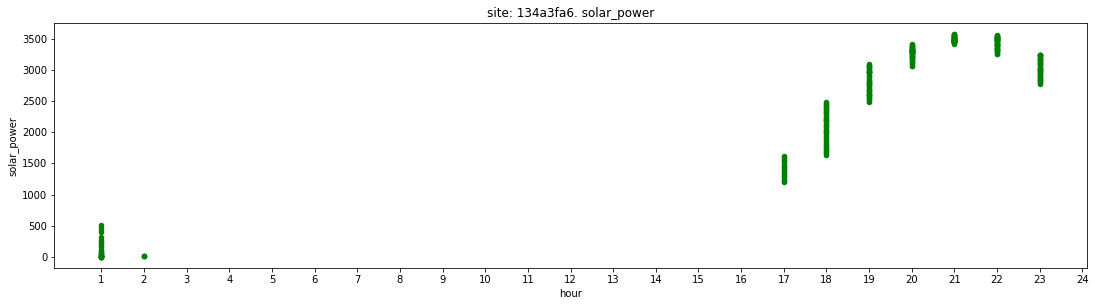

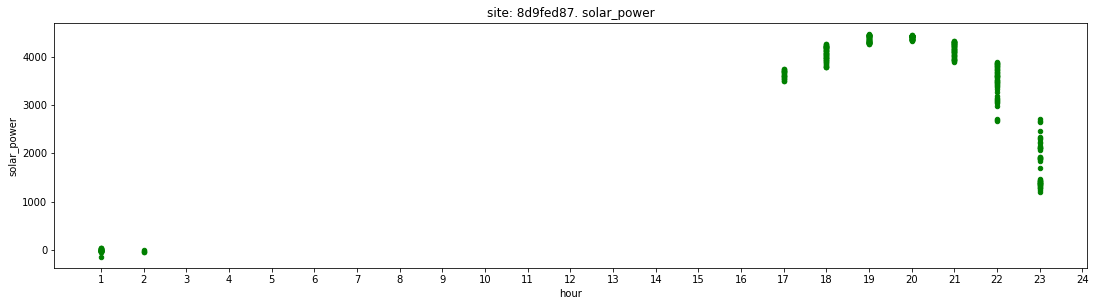

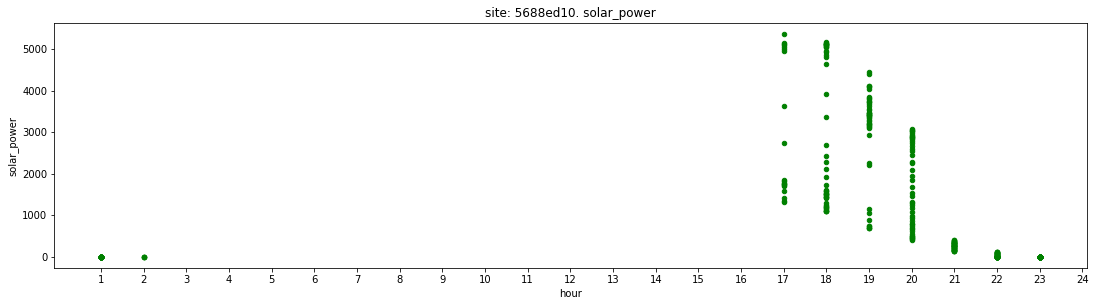

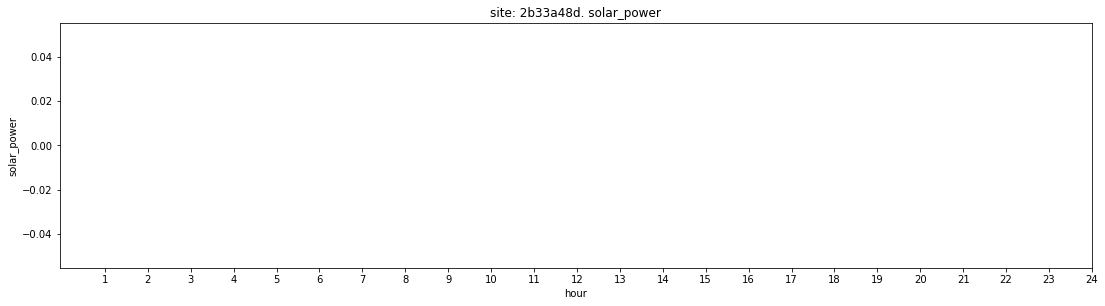

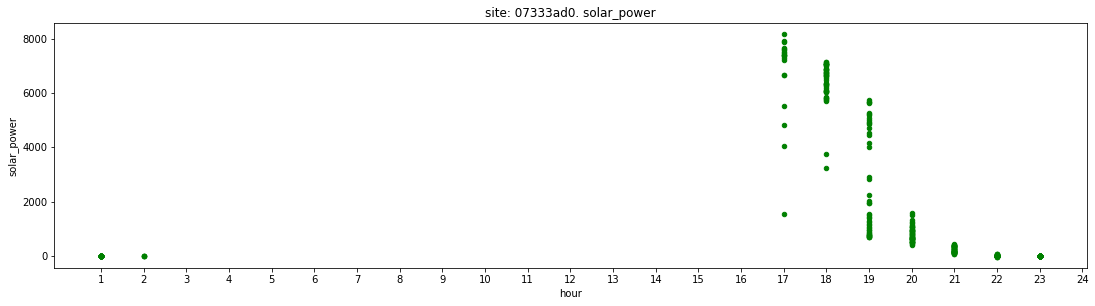

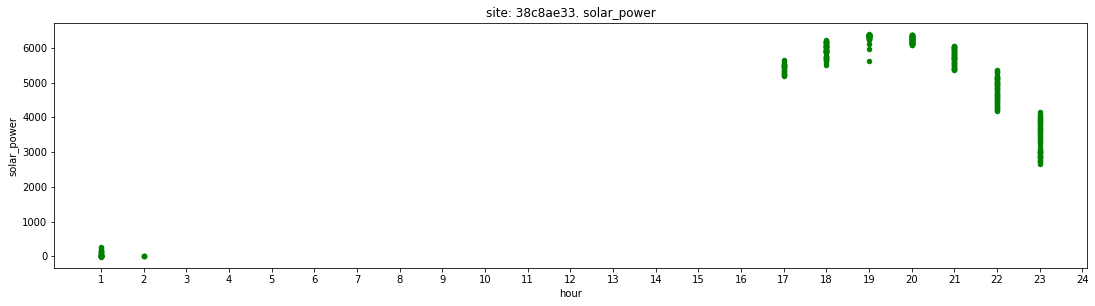

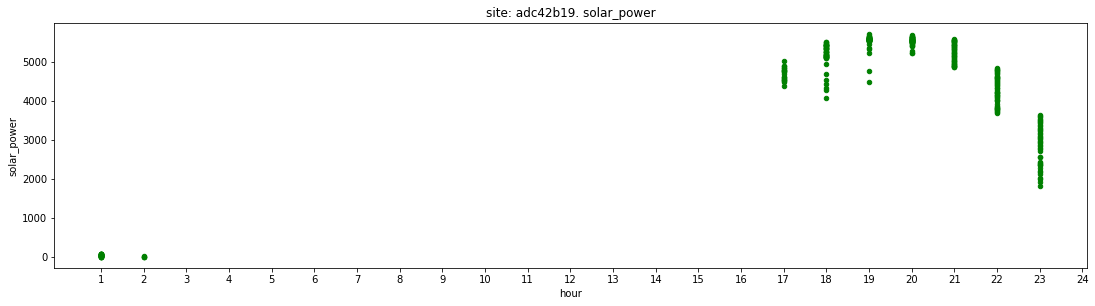

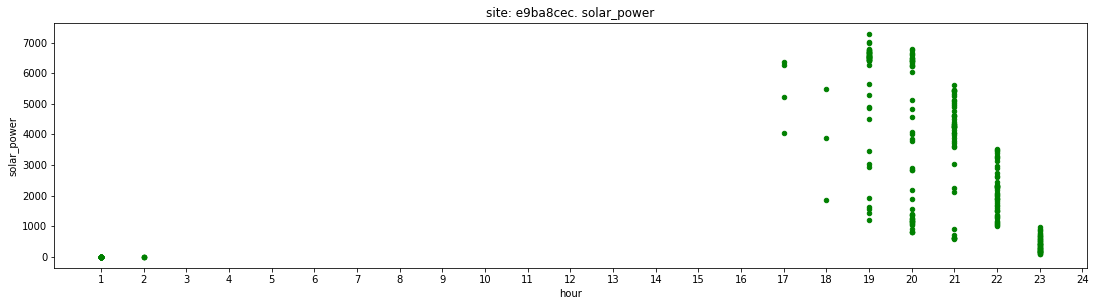

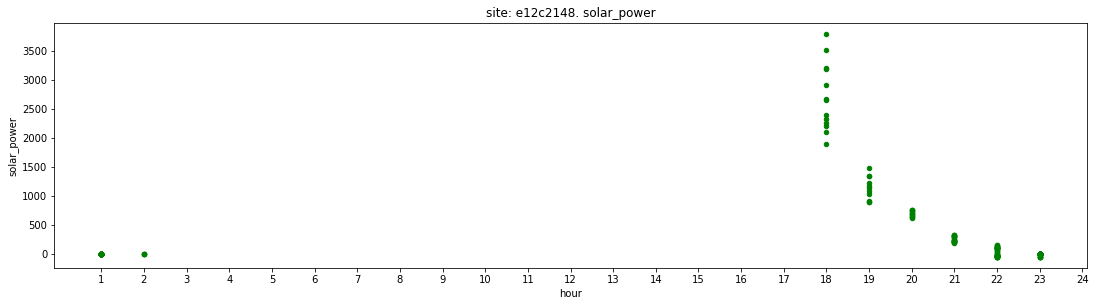

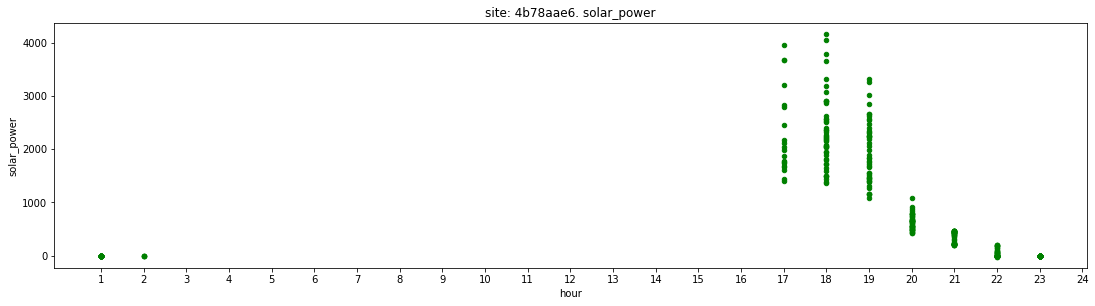

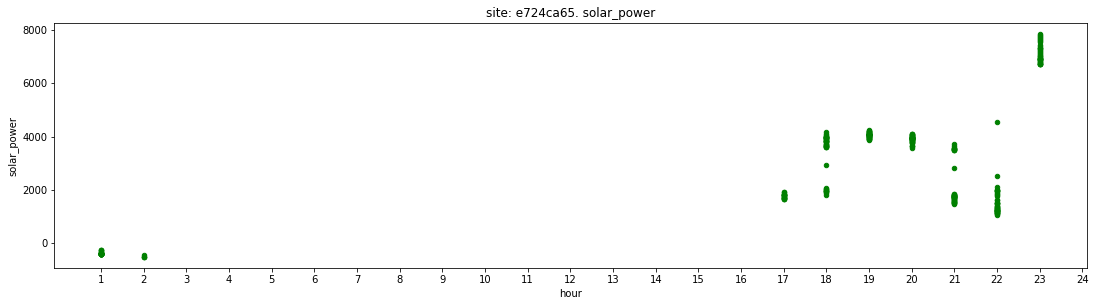

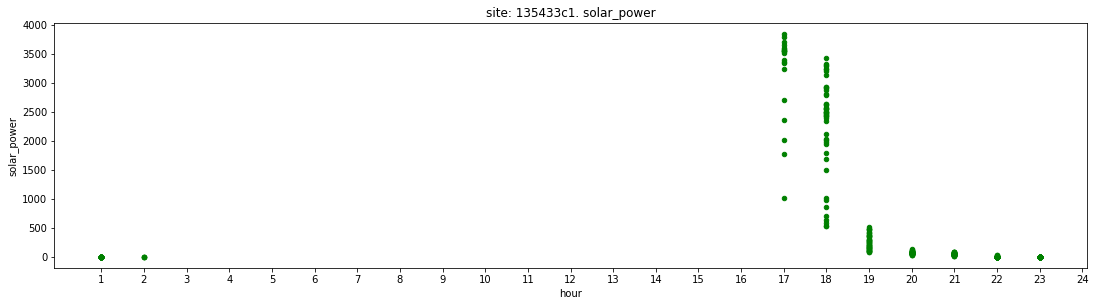

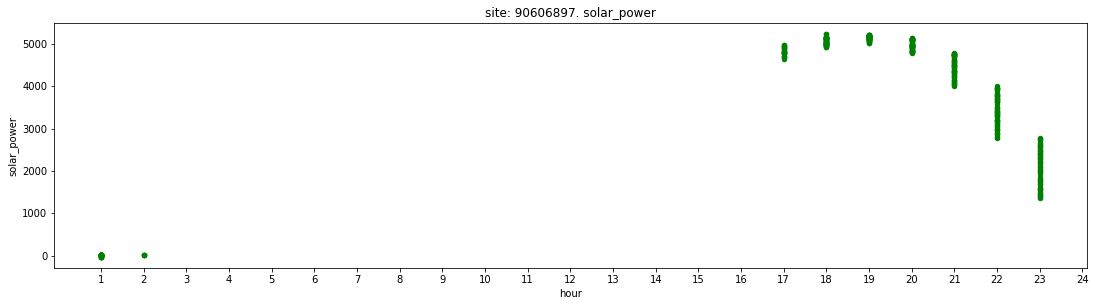

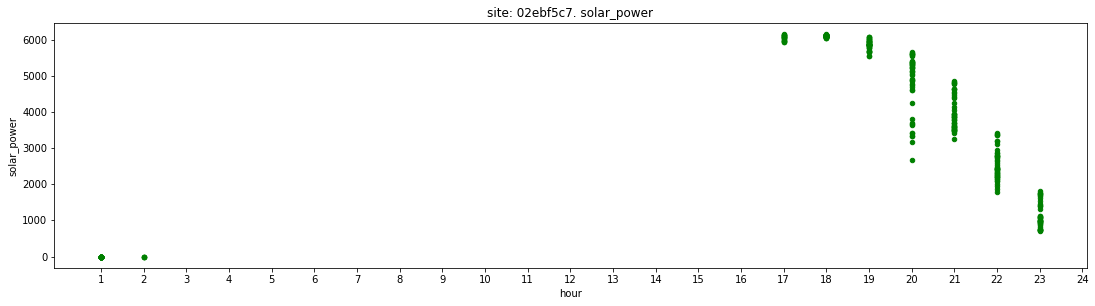

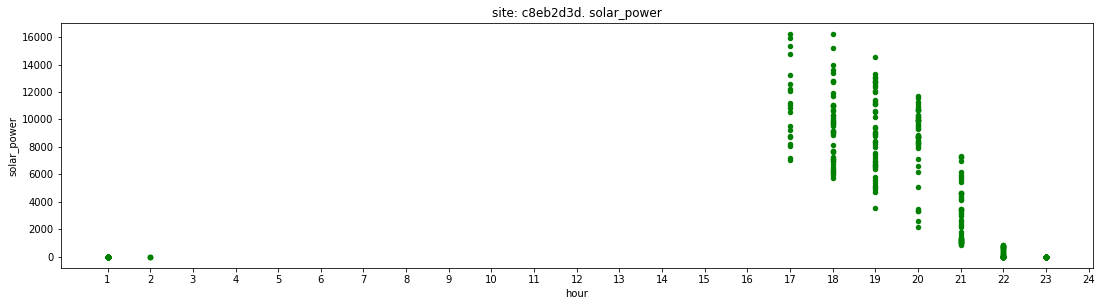

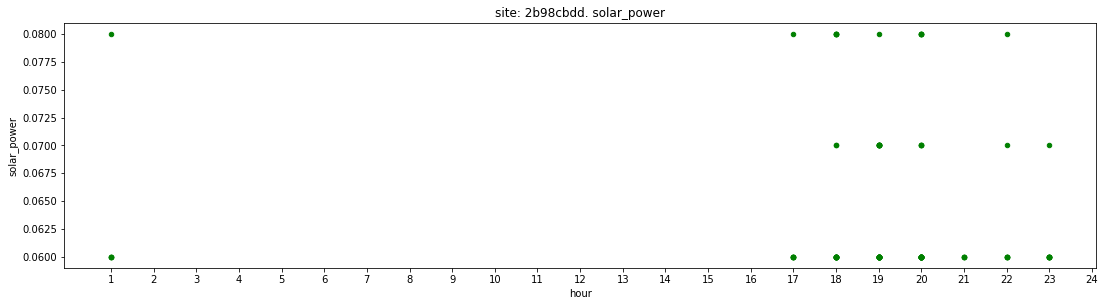

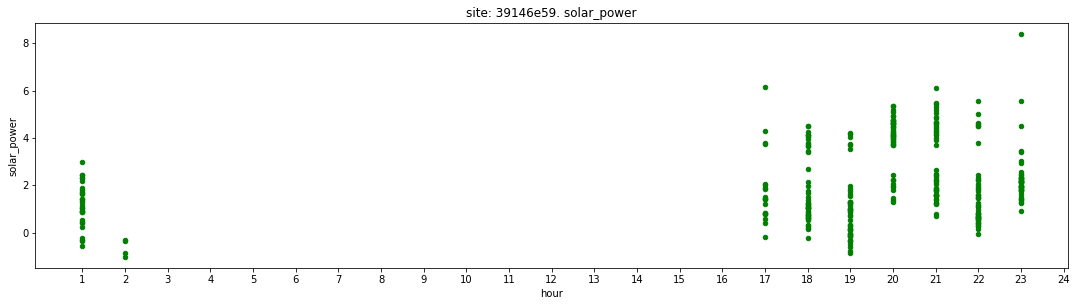

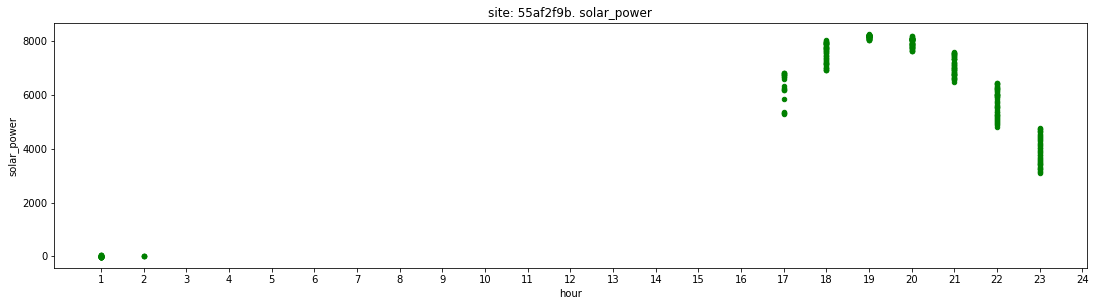

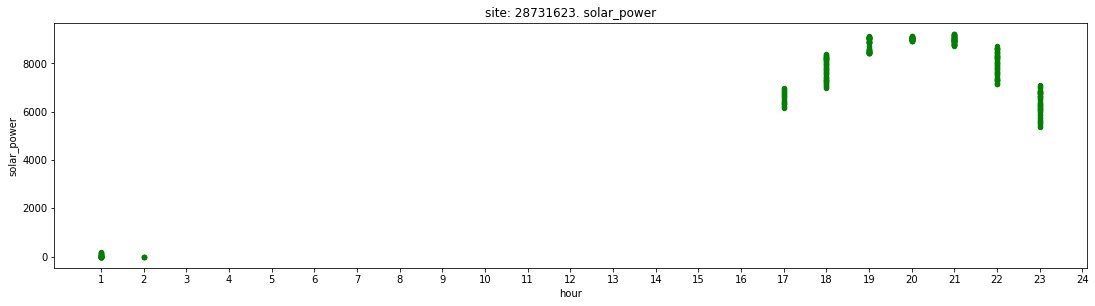

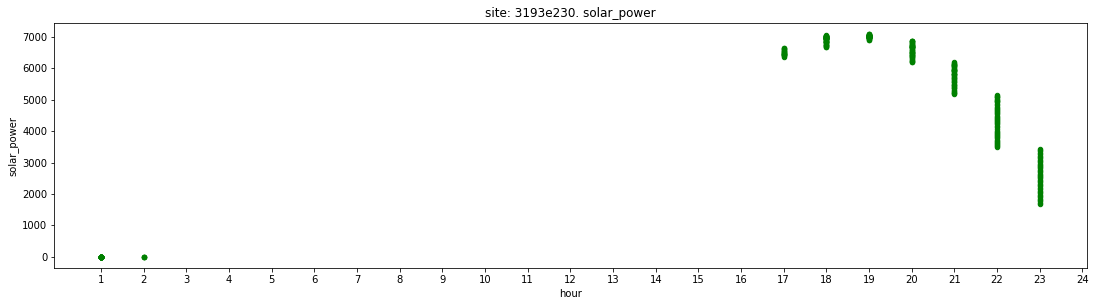

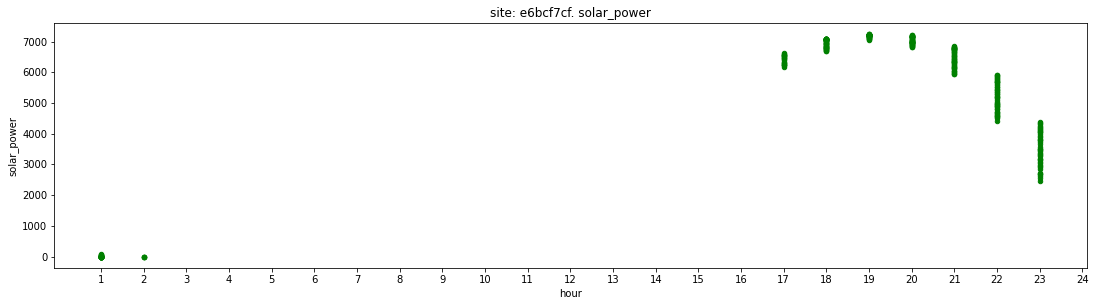

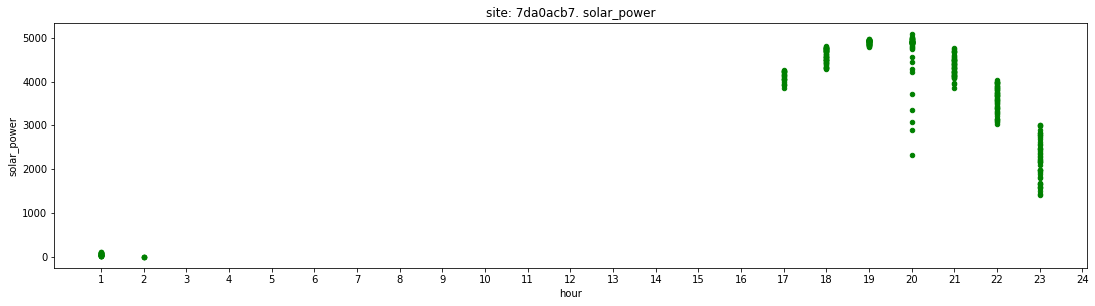

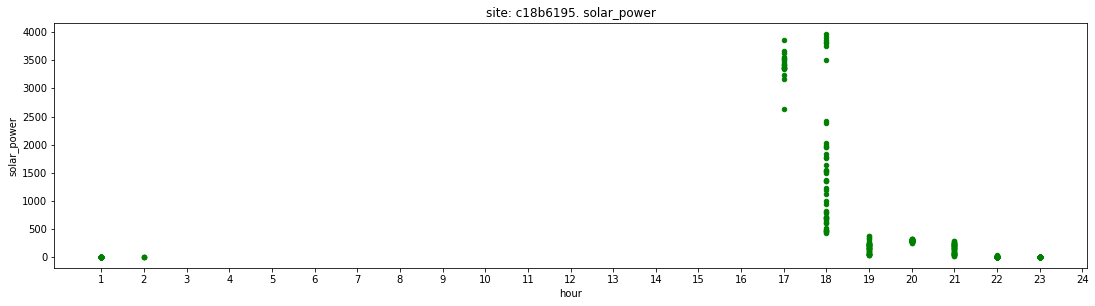

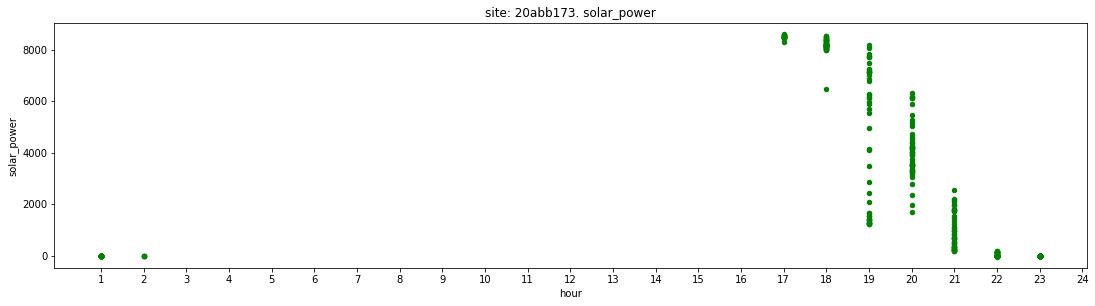

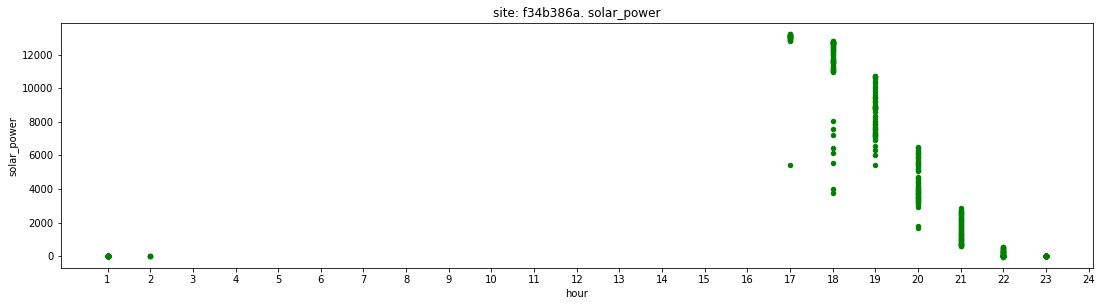

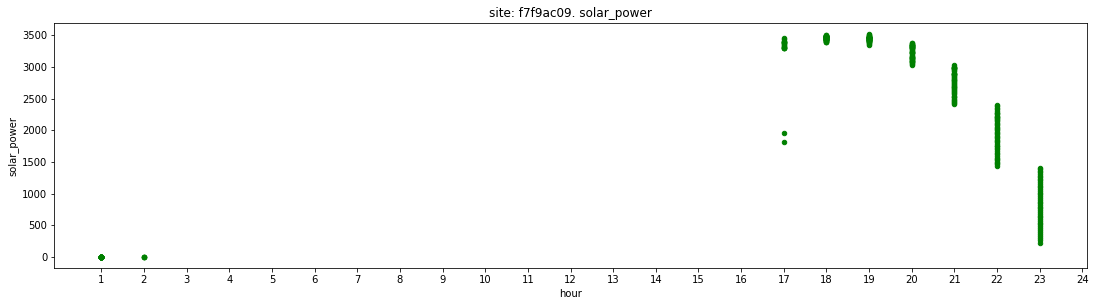

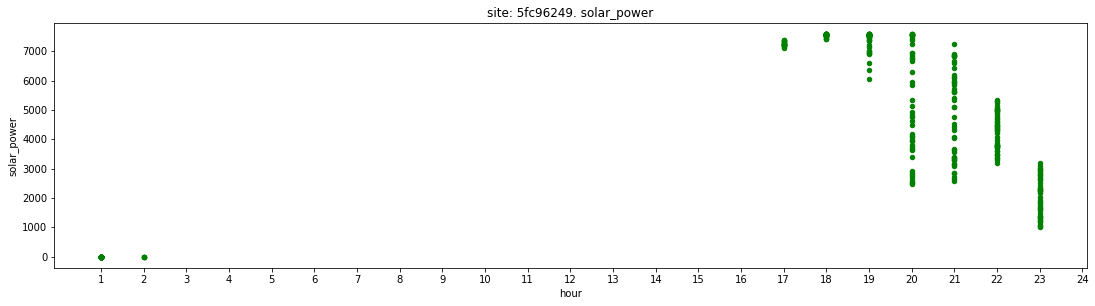

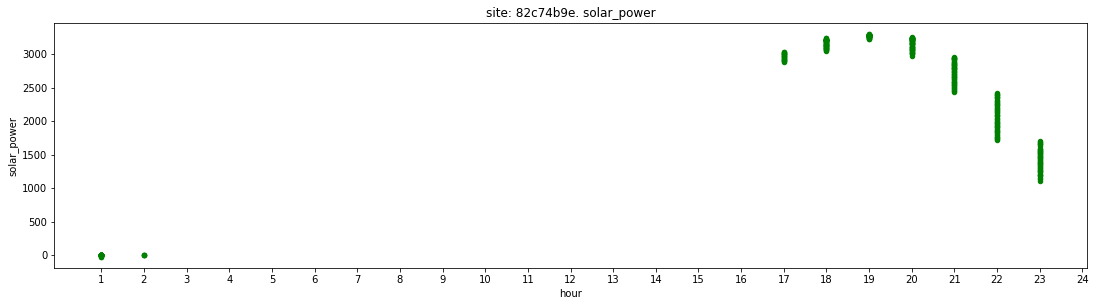

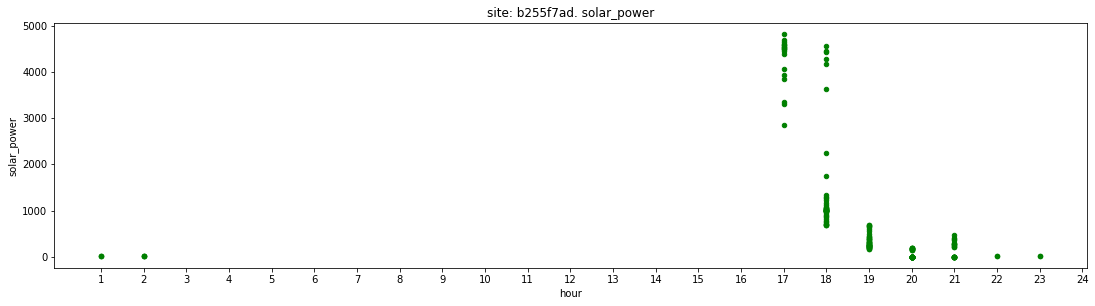

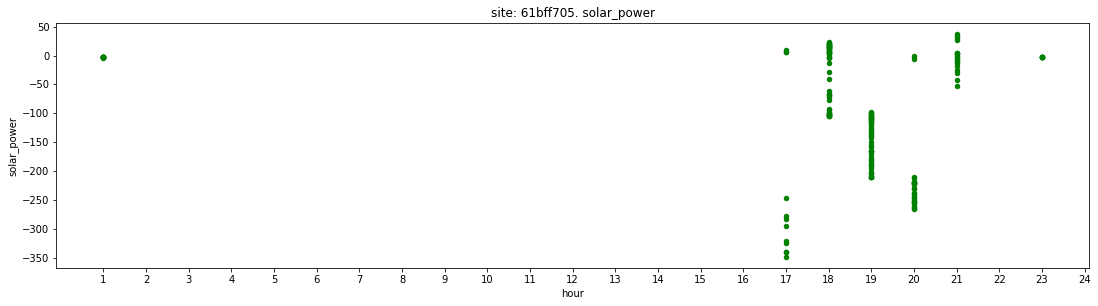

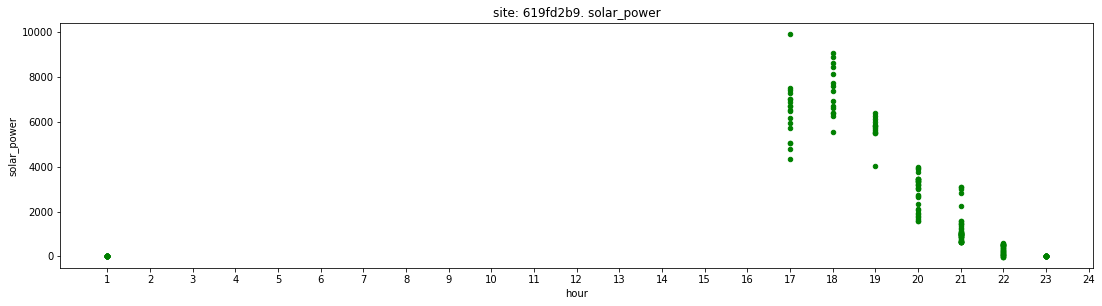

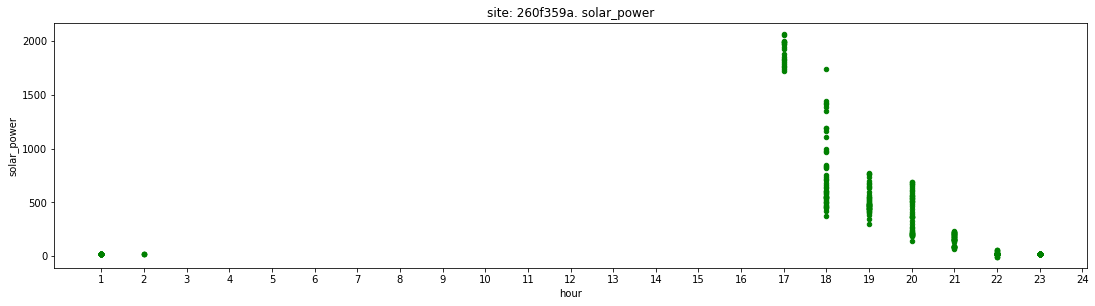

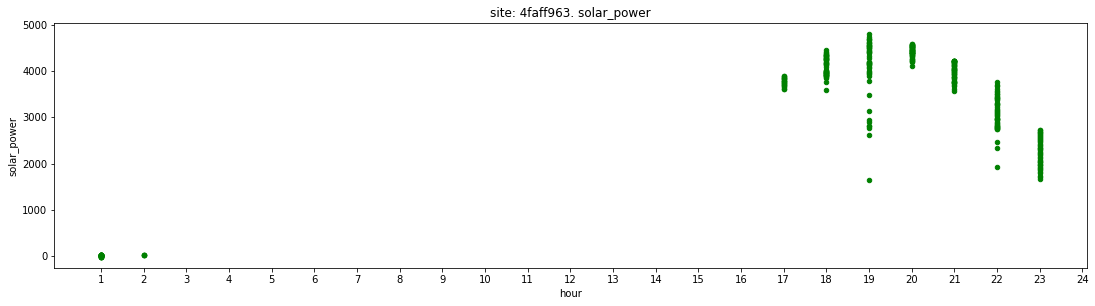

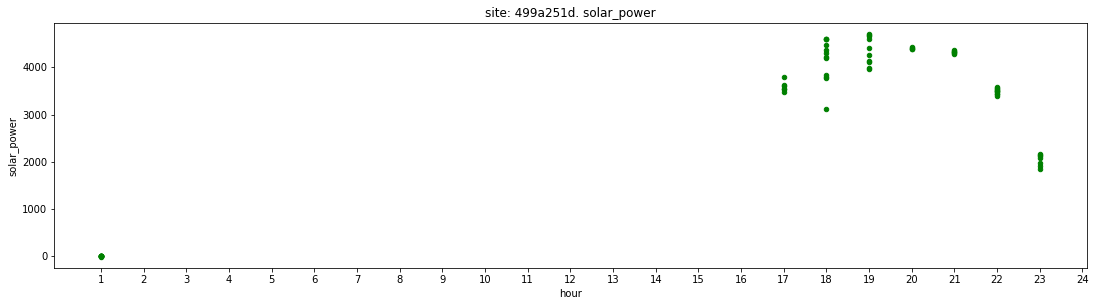

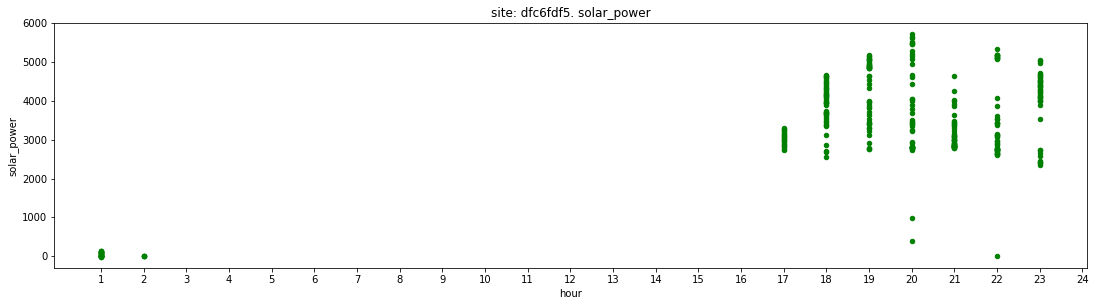

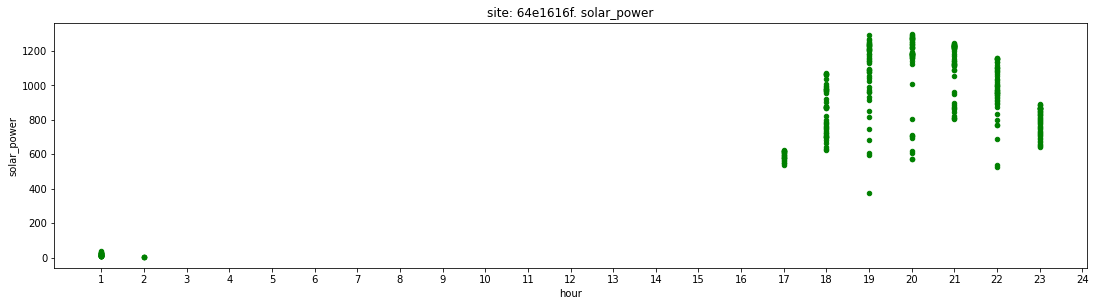

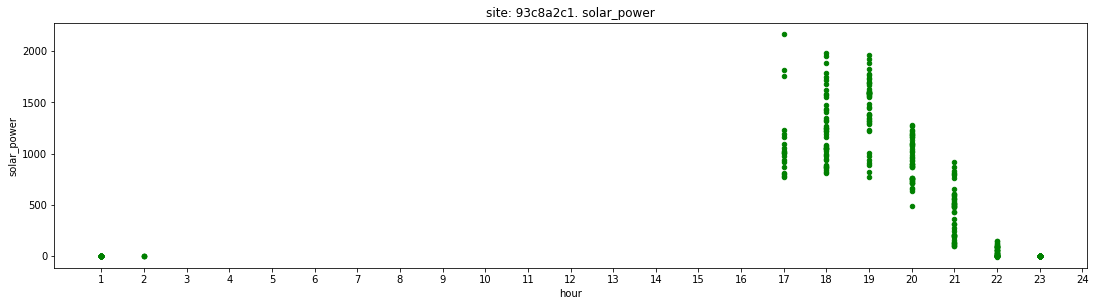

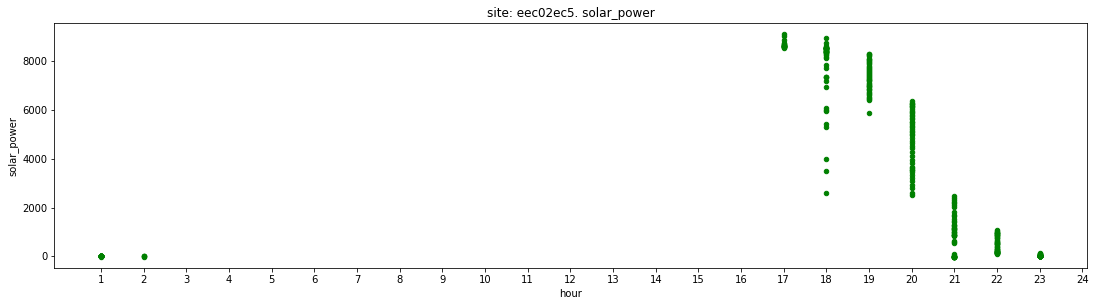

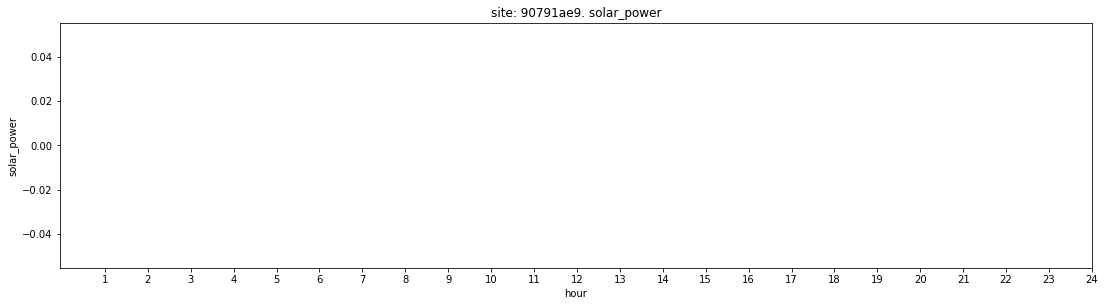

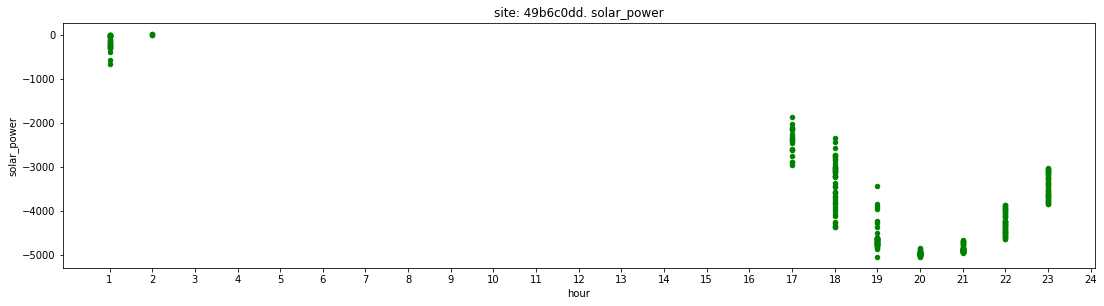

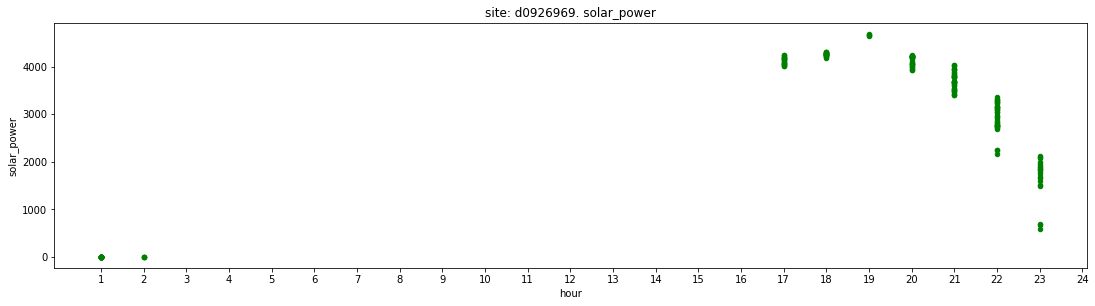

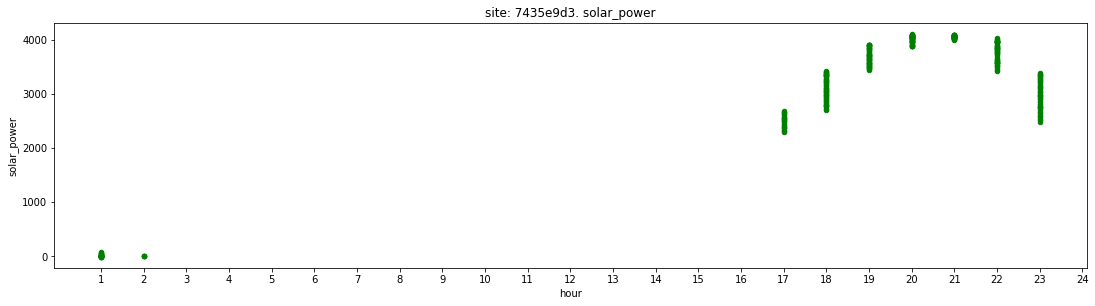

In [292]:
# plot the data
powers =["battery_power", "site_power", "solar_power"]
for s in sites:
    #for p in powers:
    ax = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(18.5, 4.5)
    site_data = data[data.site == s  ]
    #site_data.plot(kind='scatter',x='hour',y="battery_power", color='blue', ax=ax)
    #site_data.plot(kind='scatter',x='hour',y="site_power", color='purple', ax=ax)
    site_data.plot(kind='scatter',x='hour',y="solar_power", color='green', ax=ax)
    plt.title('site: '+s+". "+p)
    plt.xticks(range(1,25))
    plt.show()

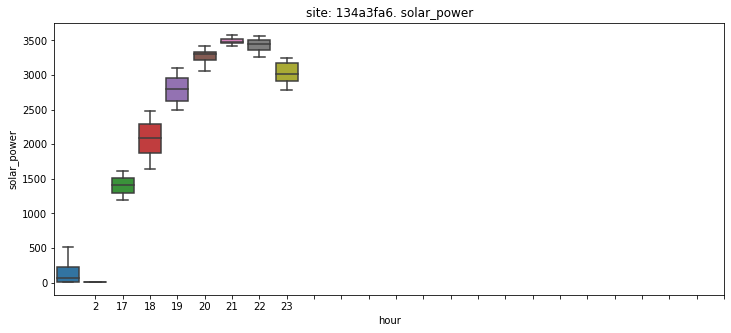

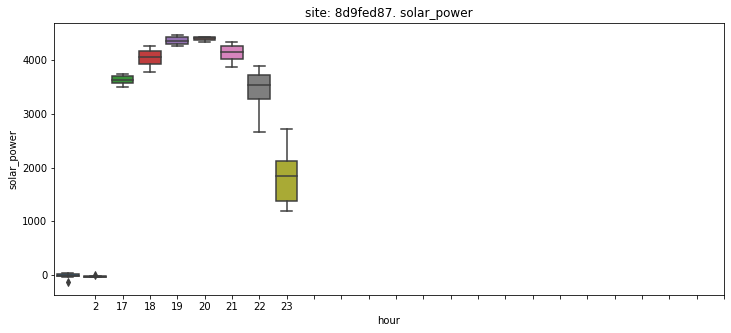

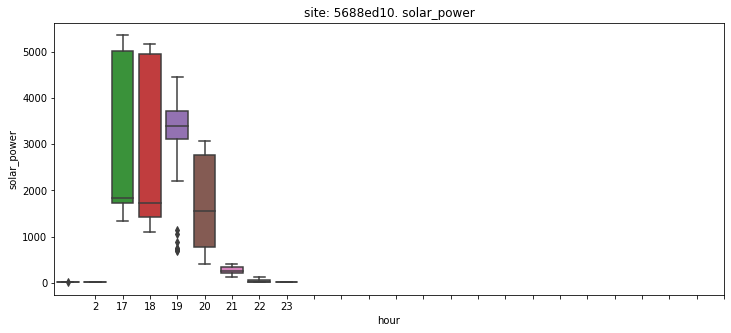

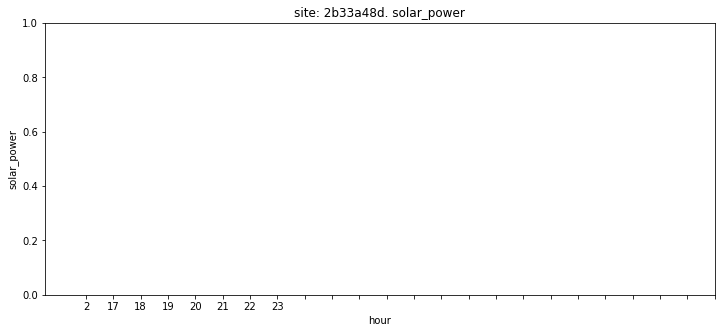

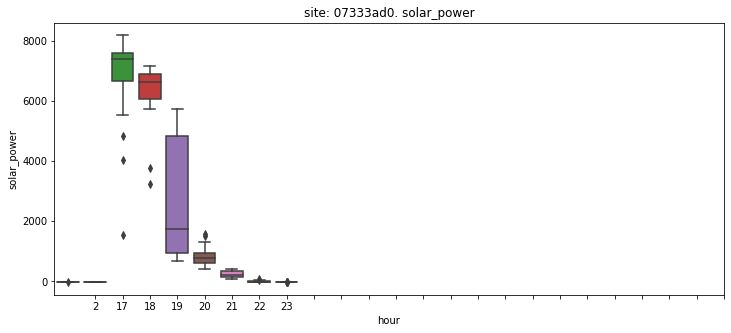

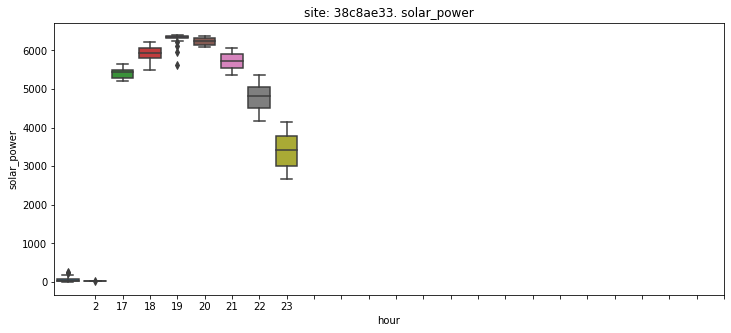

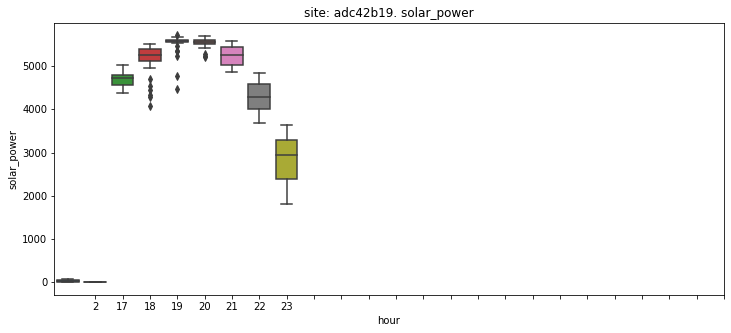

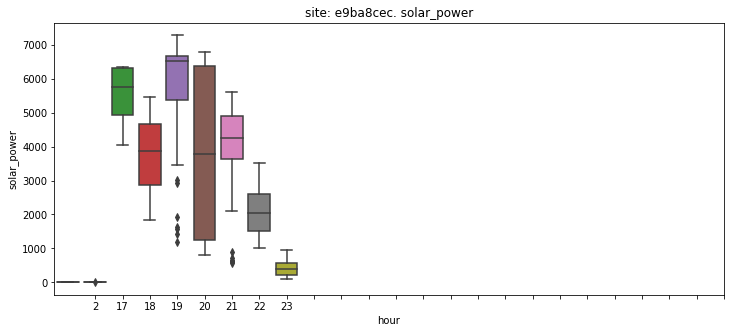

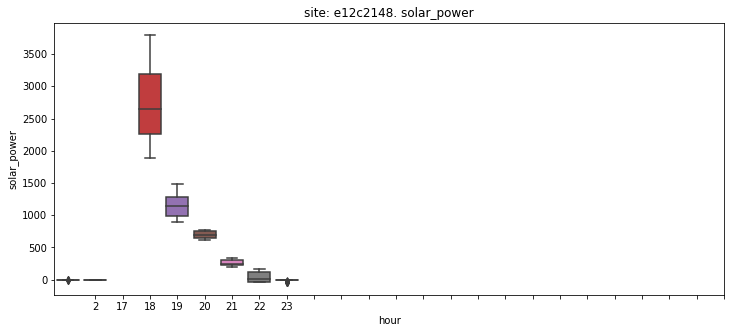

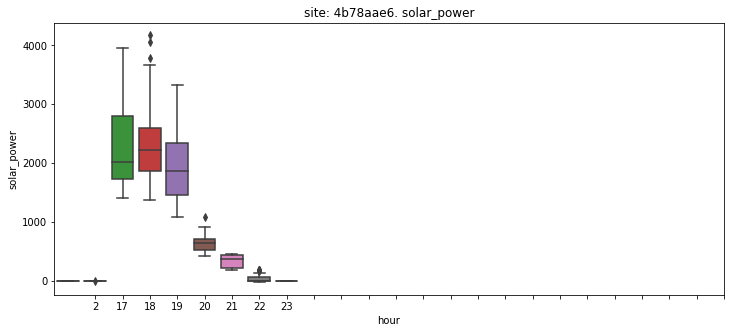

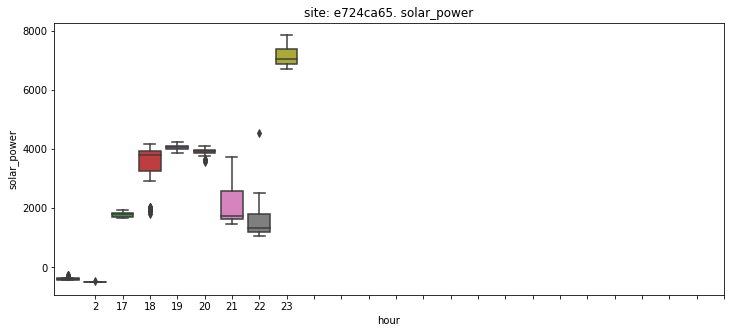

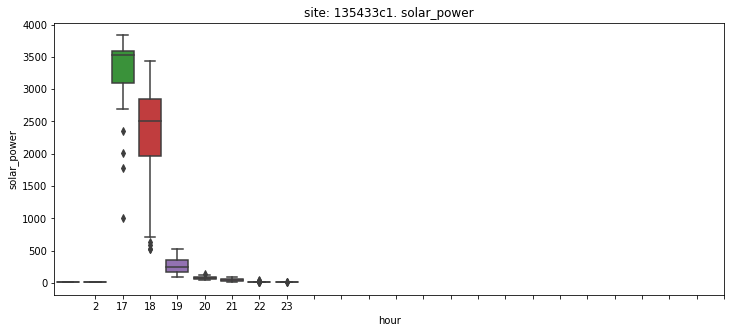

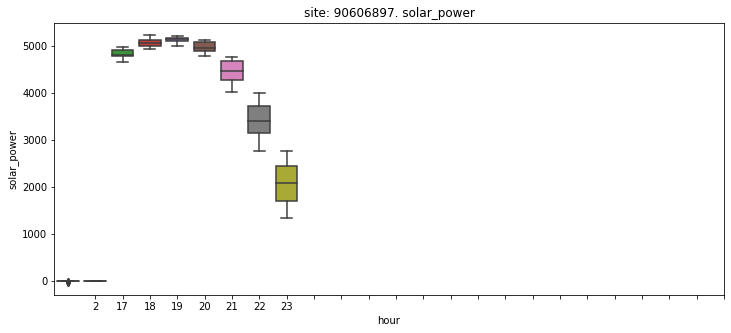

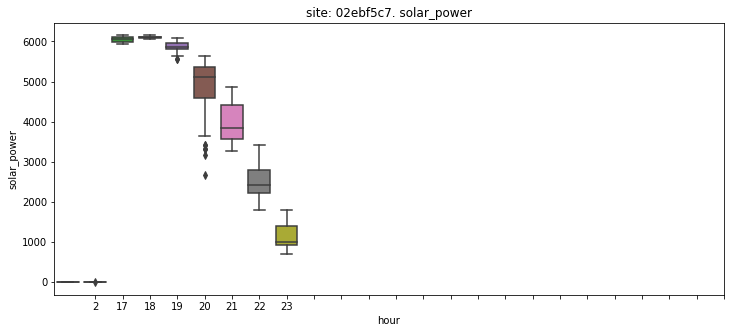

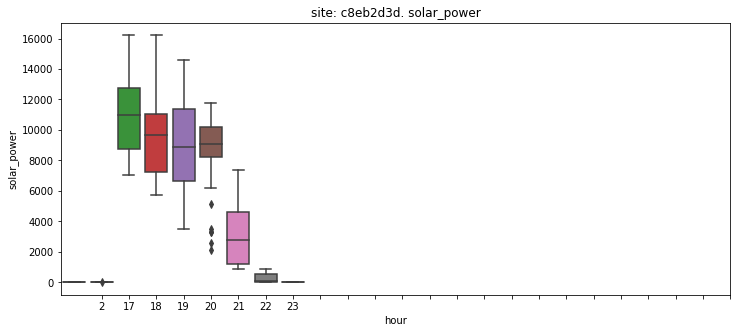

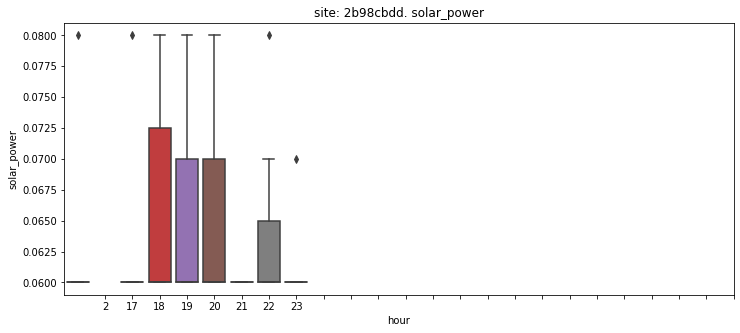

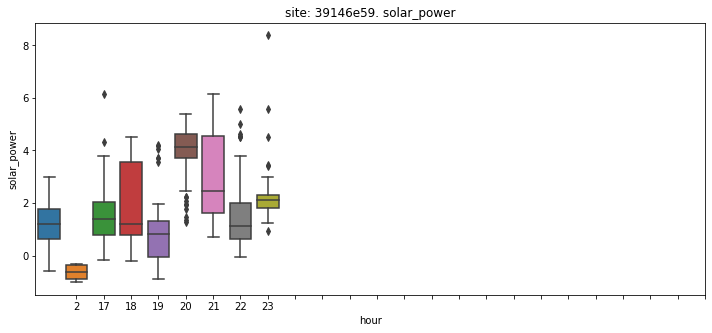

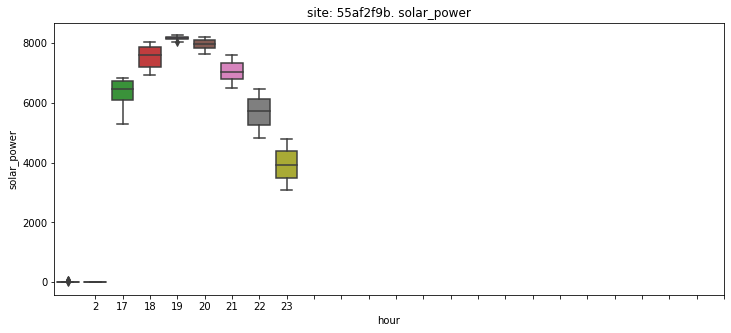

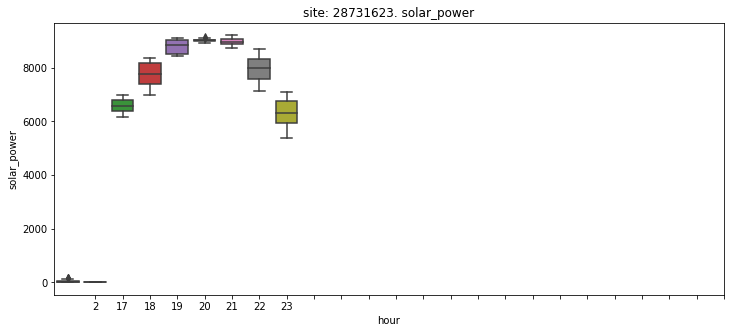

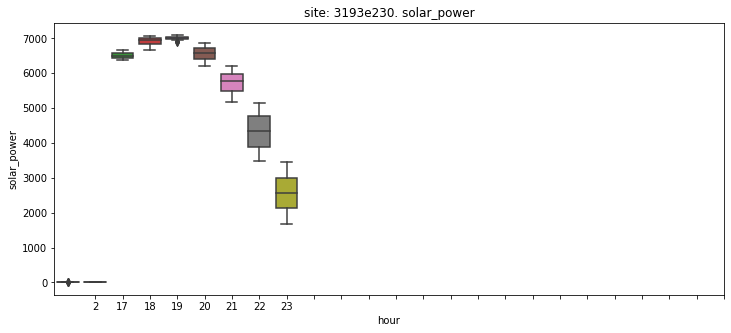

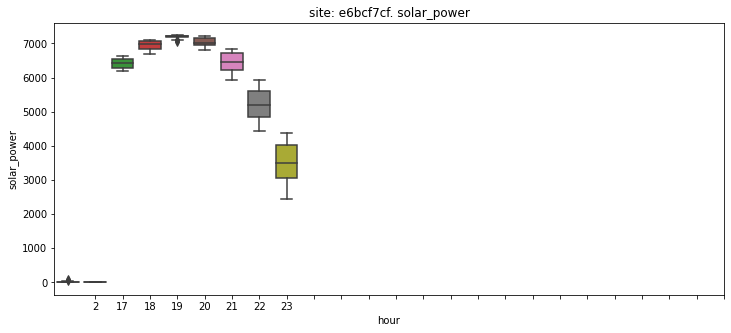

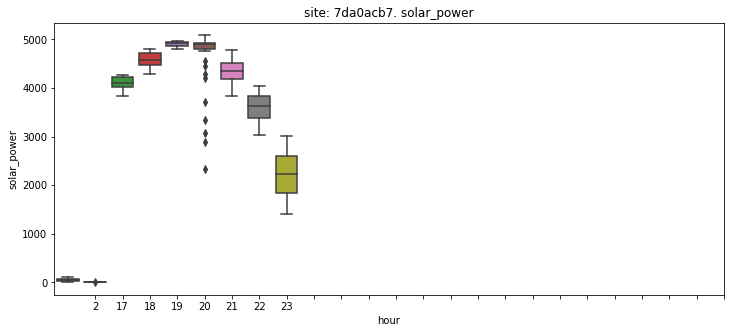

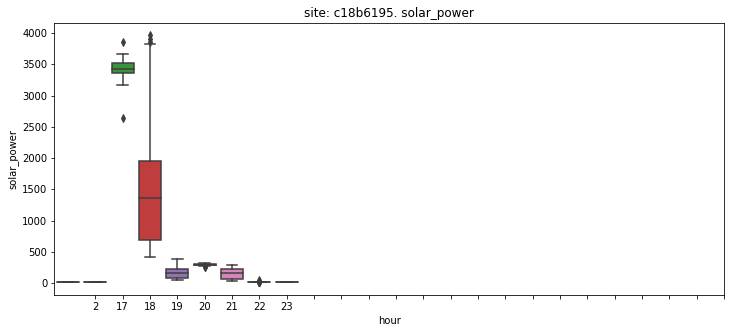

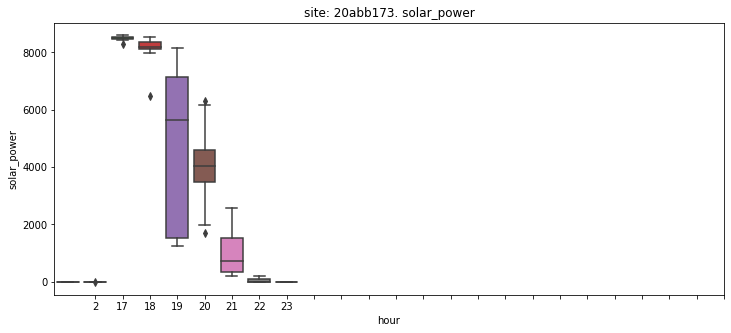

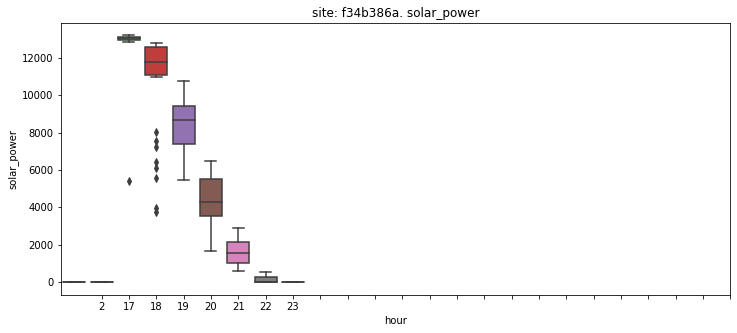

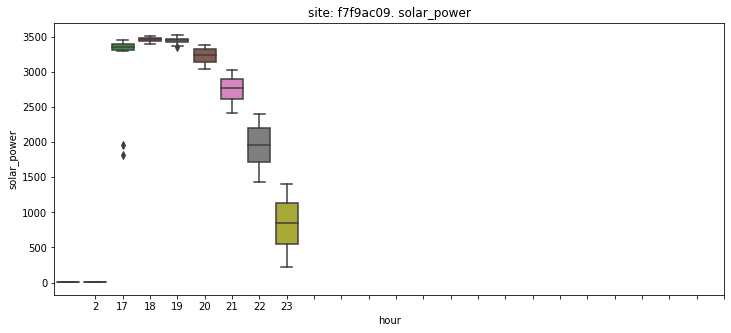

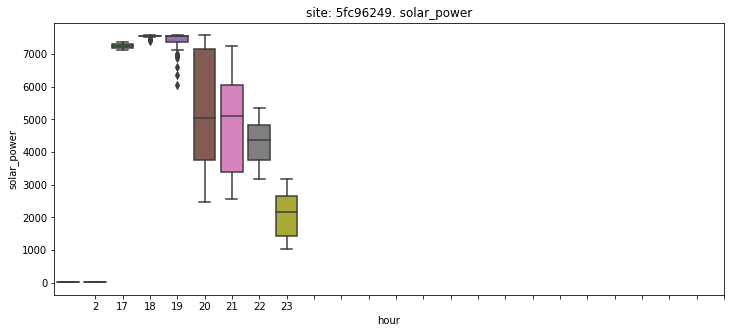

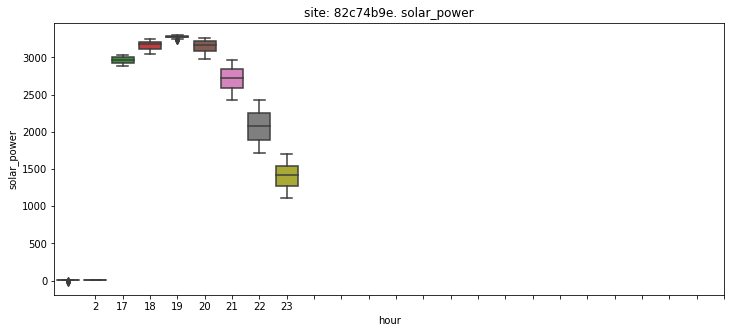

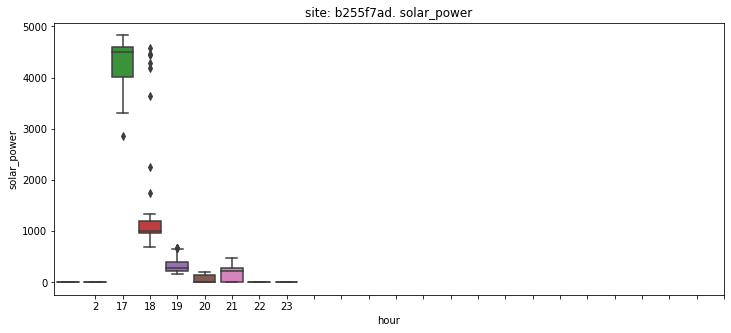

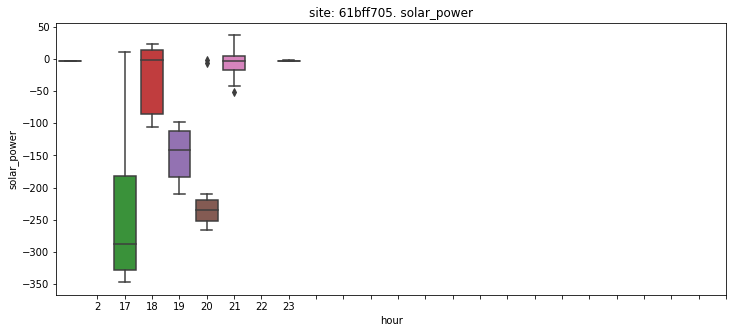

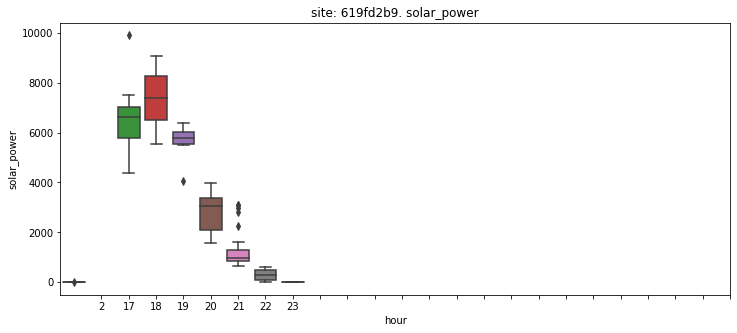

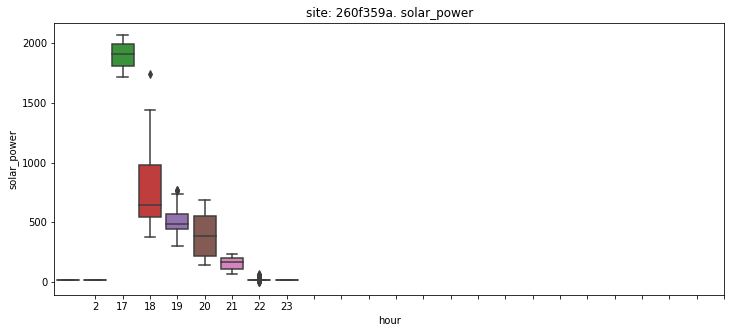

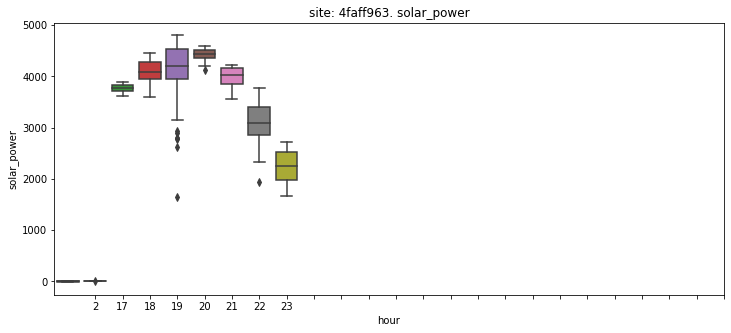

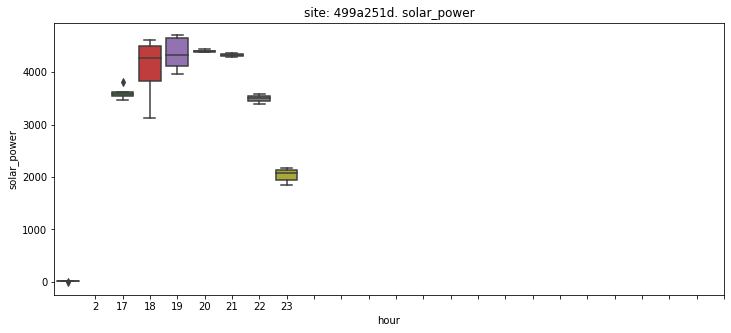

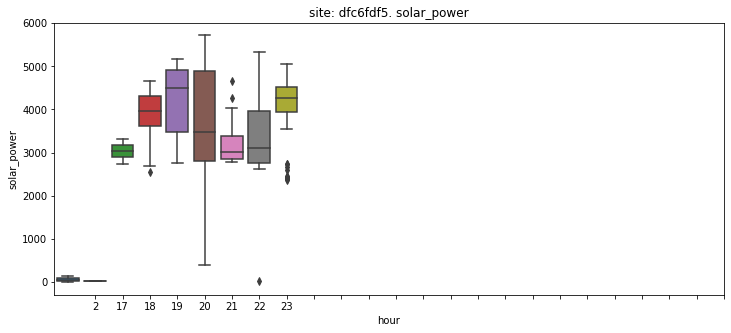

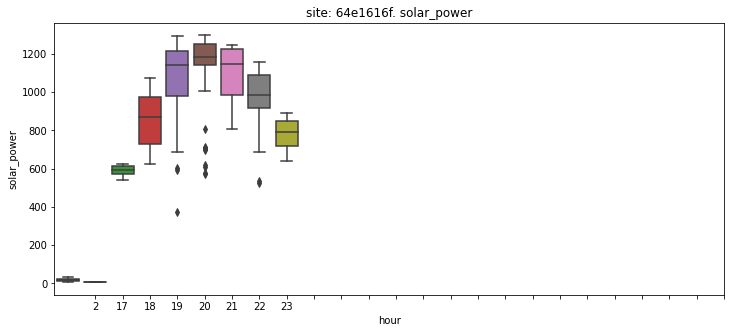

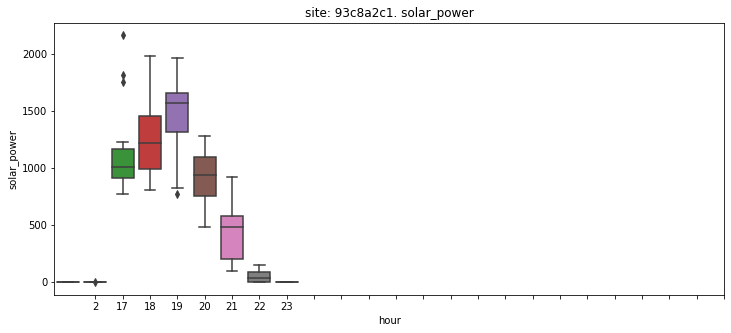

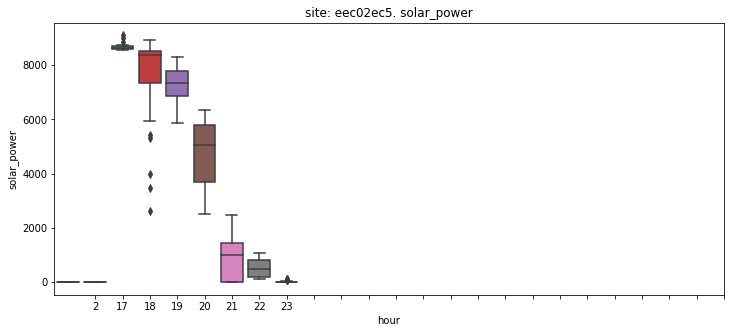

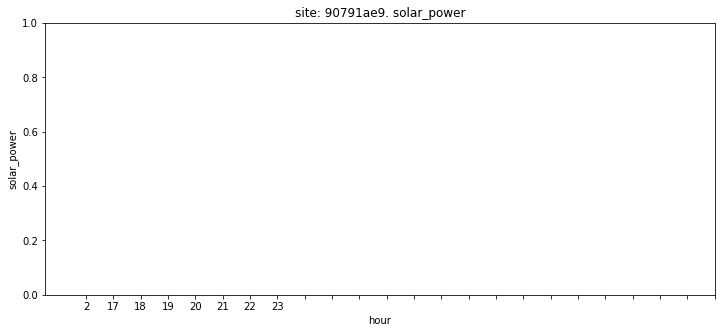

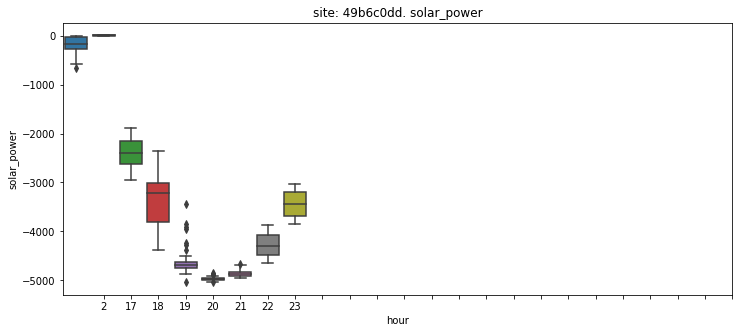

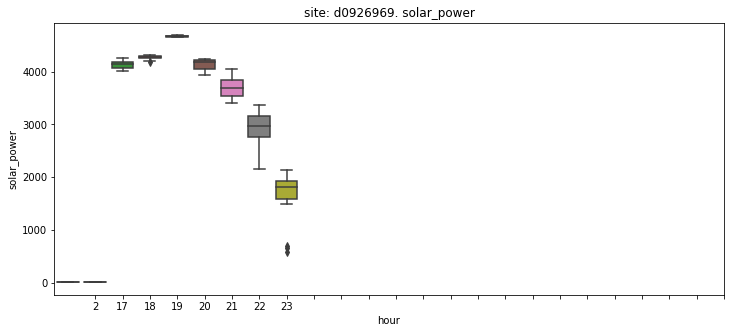

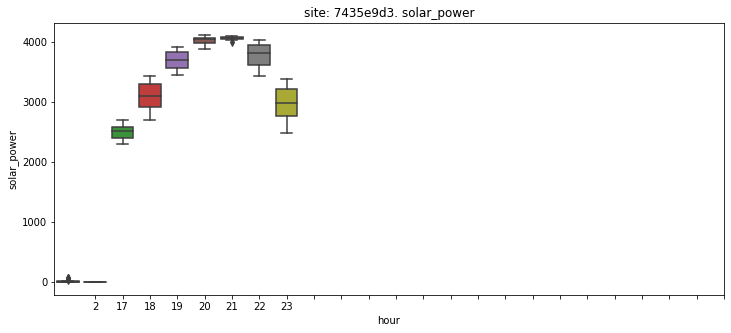

In [293]:
for s in sites:
    site_data = data[data.site == s  ]
    fig, ax = plt.subplots(figsize=(12,5))
    sns.boxplot(y=site_data["solar_power"], x=site_data["hour"])
    plt.title('site: '+s+". "+p)
    plt.xticks(range(1,25))
    plt.show()

In [275]:
q1 = pd.DataFrame(data).quantile(0.25)[0]
q3 = pd.DataFrame(data).quantile(0.75)[0]
#iqr = q3 - q1 #Interquartile range
#fence_low = q1 - (1.5*iqr)
#fence_high = q3 + (1.5*iqr)
print(q1)
print(q3)

-13.0
5.33
